# Aufgabe 5: Lichtstrahl durch Atmosphäre (10$\,$pt) ***

Bestimmen Sie numerisch durch ein kleines Computerprogramm den Weg eines Lichtstrahls von einem Punkt A zu einem $100 \, \mathrm{km}$ entfernten Punkt B durch die Atmosphäre. Der Brechungsindex $n$ der Atmosphäre ist mit ihrer Dichte $\rho$ korreliert. Es gilt

$$ \frac{n(h, \, T, \, \dots)-1}{n_0(h_0, \, T_0, \, \dots)-1} = \frac{\rho(h, \, T, \, \dots)}{\rho_0(h_0, \, T_0, \, \dots)} $$

Nehmen Sie konstante Temperatur an und benutzen Sie die barometrische Höhenformel. Die Punkte A und B liegen auf gleicher Höhe. Vernachlässigen Sie die Erdkrümmung!
Wie lang ist der optische Lichtweg? Vergleichen sie den sich ergebenden optischen Weg mit der Erwartung für ein homogenes Medium!

Für $T = \mathrm{const}$ gilt
$$ \rho(h) = \rho_0 e^{-\frac{\rho_0 g}{p_0}(h)} $$

### Imports

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Konstanten

In [2]:
# Baro Formel
p0 = 101325 # Pa
rho0 = 1.292 # kg m^-3
g = 9.81 # m s^-2
H = (p0)/(rho0*g) * 1e-3 # km

# Brechungsindex Meereshöhe
n0 = 1.00029

# Höhe
h0 = 0.0 # km

# Stützstellen
L = 100.0 # km
N = 100 + 1

### Brechnungsindex als Funktion der Höhe

In [3]:
p = lambda h: p0 * np.exp(-h/H)
n = lambda h: (n0 - 1) / p0 * p(h) + 1

### Approximation durch Stützstellen

In [6]:
def optischeWeglaenge(H, start=0, end=0, dx=1):
    H = [start, *H, end] 
    dL = np.sqrt(np.diff(H)**2 + dx**2)
    N = [n(h) for h in H[:-1]]
    l_optisch = np.sum(N * dL)
    return l_optisch

### Optische Weglänge bei gerader Strecke

In [7]:
print("%.6f km" % optischeWeglaenge([0]*(N-2)))

100.029000 km


### Lichtweg

In [8]:
res = minimize(optischeWeglaenge, [0]*(N-2))

print(res.message)
print("%.6f km" % res.fun)
h_stuetz = res.x

Optimization terminated successfully.
100.028945 km


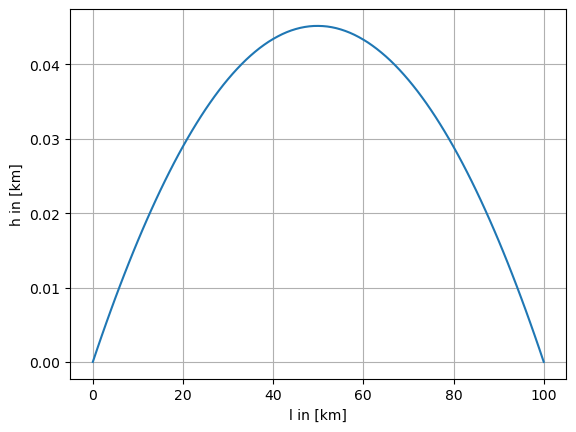

In [9]:
plt.plot(np.linspace(0,100,101), [0, *res.x, 0])
plt.xlabel("l in [km]")
plt.ylabel("h in [km]")
plt.grid()
plt.show()